# Task 6.6 Sourcing & Analyzing Time Series Data

In [9]:
# Import libraries
import pandas as pd
# I'm trying modin as a drop-in replace-- er, enhancement to pandas; supposedly it will help use more than one CPU core.
# Nope.  I'm having too much trouble getting modin installed, so it's back to plain old Pandas for now. :-(
# import modin.pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [10]:
# Import Quandl library for Task 6.6.
import quandl

In [11]:
# Import additional things that are suggested/required for Task 6.6.

# TO-DO:  Learn why (or if) it makes sense to import both a library and individual library modules separately.
import matplotlib

# Using .api imports the public access version of statsmodels, which is a library that handles statistical models.
import statsmodels.api as sm

import warnings # This is a library that handles warnings.

# Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. "These are more relevant to developers and very seldom to analysts." [Really?]
warnings.filterwarnings("ignore")

# This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html
plt.style.use('fivethirtyeight')

In [12]:
# Import scikit-learn library and select modules for Task 6.4 (see more imports for Task 6.5, next).
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Import additional modules 'KMeans' and 'pylab' - from the libraries 'scikit-learn' and 'matplotlib', respectively - for Task 6.5
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
# (Note to self:  learn more about Python imports, particularly why we don't say, "import matplotlib.pylab as pl" or "from matplotlib import pylab ...")

In [14]:
# Import folium and JSON libraries for Task 6.3.
import folium
import json 

In [15]:
# For future reference, Exercise 6.2 introduced graphical libraries Bokeh and Plotly.
# import bokeh
# import plotly

In [16]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [17]:
# Import itertools to help loop through lots of things.
import itertools

In [18]:
# I want to convert Date-Timestamps into UNIX Epoch time for analysis.
from datetime import datetime

In [19]:
# Set a PATH variable.

In [20]:
# Linux PATH, local - Sadly, my Linux system with 8GB of total RAM could not import the full dataset.
# I have moved to an AWS EC2 instance that should be able to handle this.

In [21]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [22]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/')

In [23]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM.

In [24]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

In [25]:
# This command propts matplotlib visuals to appear in the notebook.
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# BE SURE TO CENSOR THE FOLLOWING LINE BEFORE SHARING OR PUBLISHING THIS NOTEBOOK.

In [26]:
# Configure Quandl API key 

quandl.ApiConfig.api_key = 'RtifXytrs5NXsswGKz_j'

# BE SURE TO CENSOR THE PRECEDING LINE BEFORE SHARING OR PUBLISHING THIS NOTEBOOK.

# Step 1:  Install the Quandl library and register for a Quandl account as described in the Exercise.

## Done among the lines of code, above.

# Step 2:  Find a data set to work and import it into your Jupyter notebook.
## Ensure that this data somehow connects to the broader research topic for your Achievement project.
## The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.

### Grr, I was thinking that the FOMC Summary of Economic Projections for the Fed Funds Rate, Range, Midpoint (Quandl code:  FRED/FEDTARRM) looked interesting, but it's not likely to be related to my main research project for this achievement.

## Exploring Zillow Real Estate Data in Qandl (now a/k/a Nasdaq 
### See https://data.nasdaq.com/databases/ZILLOW/documentation for more information.

In [27]:
#data = quandl.get('ZILLOW/DATA')

In [28]:
quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH')

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,99999,2023-05-31,475773.959428
1,ZSFH,99999,2023-04-30,475808.561280
2,ZSFH,99999,2023-03-31,478245.160686
3,ZSFH,99999,2023-02-28,447694.734130
4,ZSFH,99999,2023-01-31,442532.972885
...,...,...,...,...
9995,ZSFH,99958,2007-06-30,73940.000000
9996,ZSFH,99958,2007-05-31,74039.000000
9997,ZSFH,99958,2007-04-30,74159.000000


In [29]:
quandl.get_table('ZILLOW/REGIONS')

,region_id,region_type,region
None,,,
0,99999,zip,"98847; WA; Wenatchee, WA; Chelan County; Pesha..."
1,99998,zip,98846; WA; Okanogan County; Pateros
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844; WA; Okanogan County; Oroville
4,99995,zip,"98843; WA; Wenatchee, WA; Douglas County; Orondo"
...,...,...,...
9995,87003,zip,"65783; MO; Springfield, MO; Dallas County; Win..."
9996,87002,zip,"65781; MO; Springfield, MO; Greene County; Wil..."
9997,87001,zip,65779; MO; Hickory County; Hermitage


In [30]:
df_zillow_regions = quandl.get_table('ZILLOW/REGIONS')

In [44]:
df_zillow_regions.dtypes

region_id      object
region_type    object
region         object
dtype: object

In [33]:
df_zillow_regions['region_type'].value_counts()

zip       9256
city       595
county     133
neigh       15
state        1
Name: region_type, dtype: int64

In [35]:
df_zillow_regions.loc[df_zillow_regions['region'].str.endswith(', TX')]

,region_id,region_type,region
None,,,
933,988,county,Denton County; TX; Dallas-Fort Worth-Arlington...
1381,982,county,"Dawson County; TX; Lamesa, TX"
1543,98,county,"Bell County; TX; Killeen-Temple, TX"
1677,978,county,Dallas County; TX; Dallas-Fort Worth-Arlington...
2625,963,county,"Crosby County; TX; Lubbock, TX"
3370,951,county,Collin County; TX; Dallas-Fort Worth-Arlington...
5911,918,county,"Carson County; TX; Amarillo, TX"
8264,890,county,"Brazos County; TX; College Station-Bryan, TX"


In [52]:
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.max_colwidth', None)  # Set display option to show the full contents of each column
# The following is the code to reset these, if needed:
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_colwidth')

In [53]:
df_zillow_regions.loc[df_zillow_regions['region'].str.contains(', TX')]

,region_id,region_type,region
None,,,
320,9961,city,"San Patricio; TX; Corpus Christi, TX; San Patricio County"
933,988,county,"Denton County; TX; Dallas-Fort Worth-Arlington, TX"
1086,9852,city,"Combes; TX; Brownsville-Harlingen, TX; Cameron County"
1381,982,county,"Dawson County; TX; Lamesa, TX"
1463,9811,city,"De Kalb; TX; Texarkana, TX-AR; Bowie County"
...,...,...,...
8099,89208,zip,"71822; AR; Texarkana, TX-AR; Little River County; Ashdown"
8264,890,county,"Brazos County; TX; College Station-Bryan, TX"
8469,8872,city,"Muenster; TX; Gainesville, TX; Cooke County"


In [54]:
df_zillow_regions.loc[(df_zillow_regions['region'].str.contains(', TX')) & (df_zillow_regions['region_type'] == 'county')]

,region_id,region_type,region
None,,,
933,988,county,"Denton County; TX; Dallas-Fort Worth-Arlington, TX"
1381,982,county,"Dawson County; TX; Lamesa, TX"
1543,98,county,"Bell County; TX; Killeen-Temple, TX"
1677,978,county,"Dallas County; TX; Dallas-Fort Worth-Arlington, TX"
2625,963,county,"Crosby County; TX; Lubbock, TX"
3370,951,county,"Collin County; TX; Dallas-Fort Worth-Arlington, TX"
5911,918,county,"Carson County; TX; Amarillo, TX"
8264,890,county,"Brazos County; TX; College Station-Bryan, TX"


## I'm not confident that the matches for ", TX" in non-county regions are necessarily in the state of Texas.
## Some, like region_id 8714, appear to overlap with parts of Arkansas.

In [55]:
df_zillow_regions.loc[df_zillow_regions['region_id'] == '8714']

,region_id,region_type,region
None,,,
9870,8714,city,"Foreman; AR; Texarkana, TX-AR; Little River County"


## I will stick with 'county' region types, for now.

## Exploring the ZILLOW/INDICATORS table.

In [56]:
df_zillow_indicators = quandl.get_table('ZILLOW/INDICATORS')

In [57]:
df_zillow_indicators.shape

(56, 3)

In [59]:
df_zillow_indicators

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z4BR,ZHVI 4-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values


## Let's analyze the data for the first indicator, "ZHVI Single-Family Homes Time Series ($)," for the counties in Texas.

In [60]:
df_zillow_texas = df_zillow_regions.loc[(df_zillow_regions['region'].str.contains(', TX')) & (df_zillow_regions['region_type'] == 'county')]

In [63]:
# I don't know why Zillow has county entries for so few Texas counties, but let's see what we can do.
df_zillow_texas

,region_id,region_type,region
None,,,
933,988,county,"Denton County; TX; Dallas-Fort Worth-Arlington, TX"
1381,982,county,"Dawson County; TX; Lamesa, TX"
1543,98,county,"Bell County; TX; Killeen-Temple, TX"
1677,978,county,"Dallas County; TX; Dallas-Fort Worth-Arlington, TX"
2625,963,county,"Crosby County; TX; Lubbock, TX"
3370,951,county,"Collin County; TX; Dallas-Fort Worth-Arlington, TX"
5911,918,county,"Carson County; TX; Amarillo, TX"
8264,890,county,"Brazos County; TX; College Station-Bryan, TX"


In [64]:
df_zillow_texas['region_id'].tolist()

['988', '982', '98', '978', '963', '951', '918', '890']

In [65]:
df_zillow_data_texas = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=df_zillow_texas['region_id'].tolist())

In [66]:
df_zillow_data_texas.shape

(2039, 4)

In [67]:
df_zillow_data_texas.head

<bound method NDFrame.head of      indicator_id region_id       date          value
None                                                 
0            ZSFH       988 2023-05-31  465447.626961
1            ZSFH       988 2023-04-30  464079.442752
2            ZSFH       988 2023-03-31  463835.541361
3            ZSFH       988 2023-02-28  462432.745962
4            ZSFH       988 2023-01-31  460147.935932
...           ...       ...        ...            ...
2034         ZSFH       890 2005-05-31  135584.000000
2035         ZSFH       890 2005-04-30  134068.000000
2036         ZSFH       890 2005-03-31  132825.000000
2037         ZSFH       890 2005-02-28  132199.000000
2038         ZSFH       890 2005-01-31  131823.000000

[2039 rows x 4 columns]>

In [69]:
df_zillow_data_texas.dtypes

indicator_id            object
region_id               object
date            datetime64[ns]
value                  float64
dtype: object

In [72]:
# We need to convert this to a proper time series.
ts_zillow_data_texas = df_zillow_data_texas
ts_zillow_data_texas['datetime'] = pd.to_datetime(ts_zillow_data_texas['date']) # Create a datetime column from "Date.""
ts_zillow_data_texas = ts_zillow_data_texas.set_index('datetime') # Set the datetime as the index of the dataframe.
ts_zillow_data_texas.drop(['date', 'indicator_id', 'region_id'], axis=1, inplace=True) # Drop the "Date" column.
ts_zillow_data_texas.head()

,value
datetime,
2023-05-31,465447.626961
2023-04-30,464079.442752
2023-03-31,463835.541361
2023-02-28,462432.745962
2023-01-31,460147.935932


In [73]:
ts_zillow_data_texas.shape

(2039, 1)

In [74]:
ts_zillow_data_texas.tail()

,value
datetime,
2005-05-31,135584.0
2005-04-30,134068.0
2005-03-31,132825.0
2005-02-28,132199.0
2005-01-31,131823.0


In [75]:
type(ts_zillow_data_texas)

pandas.core.frame.DataFrame

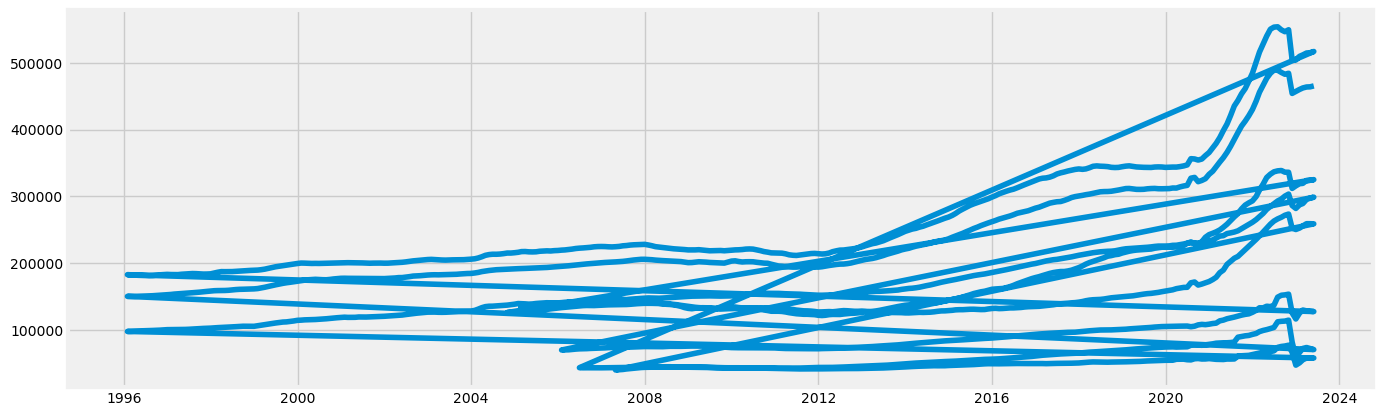

In [76]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(ts_zillow_data_texas)

## I feared we might get something wacky, since we were mixing data from several counties, but it was worth seeing

# Step 3:  Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.

## Let's focus on one county - hopefully one that is also in our weather dataset!

## Load and check our updated dataframe for Texas weather from Task 6.3.

### (There were no changes to our dataframe in Tasks 6.4 or 6.5.)

In [77]:
df_weather = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_texas.Task-6.3.pkl'))

In [78]:
df_weather.shape

(515813, 34)

In [79]:
df_weather.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth',
       'Rain-sum-AC-SY-M', 'Rain-sum-AC-SY', 'Snow-sum-AC-SY-M',
       'Snow-sum-AC-SY', 'CO-Num-AC', 'Rain-sumavg-CO-SY-M',
       'Rain-sumavg-CO-SY', 'Snow-sumavg-CO-SY-M', 'Snow-sumavg-CO-SY',
       'GeoJSONCounty'],
      dtype='object')

In [80]:
df_zillow_texas['region']

None
933     Denton County; TX; Dallas-Fort Worth-Arlington, TX
1381                         Dawson County; TX; Lamesa, TX
1543                   Bell County; TX; Killeen-Temple, TX
1677    Dallas County; TX; Dallas-Fort Worth-Arlington, TX
2625                        Crosby County; TX; Lubbock, TX
3370    Collin County; TX; Dallas-Fort Worth-Arlington, TX
5911                       Carson County; TX; Amarillo, TX
8264          Brazos County; TX; College Station-Bryan, TX
Name: region, dtype: object

In [81]:
# Match counties from df_zillow_texas against those in df_weather.
pattern = r'(Denton|Dawson|Bell|Dallas|Crosby|Collin|Carson|Brazos) County'

filtered_df = df_weather.loc[df_weather['GeoJSONCounty'].str.contains(pattern)]

filtered_df['GeoJSONCounty'].value_counts()

Dallas County    14954
Bell County      14113
Brazos County     6899
Collin County     2934
Denton County     2843
Name: GeoJSONCounty, dtype: int64

## I might as well choose Dallas County, which has the greatest number of measurements in the df_weather dataset.  It gets at least some rain, and likely has a robust real estate market with lots of data points.

In [87]:
df_zillow_data_dallas_county = df_zillow_data_texas.loc[df_zillow_data_texas['region_id'] == '978'] 

In [88]:
df_zillow_data_dallas_county

,indicator_id,region_id,date,value,datetime
None,,,,,
747,ZSFH,978,2023-05-31,324978.027979,2023-05-31
748,ZSFH,978,2023-04-30,324002.440681,2023-04-30
749,ZSFH,978,2023-03-31,323775.027494,2023-03-31
750,ZSFH,978,2023-02-28,319388.827100,2023-02-28
751,ZSFH,978,2023-01-31,318855.598152,2023-01-31
...,...,...,...,...,...
1071,ZSFH,978,1996-05-31,98381.000000,1996-05-31
1072,ZSFH,978,1996-04-30,98032.000000,1996-04-30
1073,ZSFH,978,1996-03-31,97707.000000,1996-03-31


In [91]:
# We need to convert this to a proper time series.
ts_zillow_data_dallas_county = df_zillow_data_dallas_county
ts_zillow_data_dallas_county['datetime'] = pd.to_datetime(ts_zillow_data_dallas_county['date']) # Create a datetime column from "Date.""
ts_zillow_data_dallas_county = ts_zillow_data_dallas_county.set_index('datetime') # Set the datetime as the index of the dataframe.
ts_zillow_data_dallas_county.drop(['date', 'indicator_id', 'region_id'], axis=1, inplace=True) # Drop the "Date" column.
ts_zillow_data_dallas_county.head()

,value
datetime,
2023-05-31,324978.027979
2023-04-30,324002.440681
2023-03-31,323775.027494
2023-02-28,319388.827100
2023-01-31,318855.598152


In [92]:
ts_zillow_data_dallas_county.tail()

,value
datetime,
1996-05-31,98381.0
1996-04-30,98032.0
1996-03-31,97707.0
1996-02-29,97503.0
1996-01-31,97443.0


In [94]:
type(ts_zillow_data_dallas_county)

pandas.core.frame.DataFrame

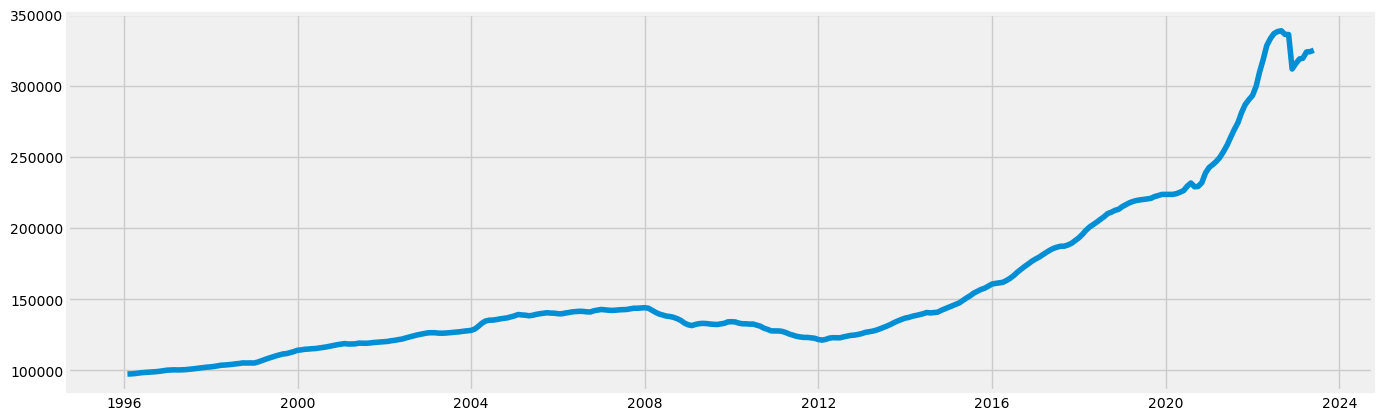

In [95]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(ts_zillow_data_dallas_county)

## Much better!

In [96]:
# Check for missing values.

ts_zillow_data_dallas_county.isnull().sum() 

value    0
dtype: int64

In [97]:
# Check for duplicates.

dups = ts_zillow_data_dallas_county.duplicated()
dups.sum()

1

In [ ]:
# Aw, we have a duplicate to investigate.

In [114]:
#pd.set_option('display.max_rows', None)   # Show all rows
# The following is the code to reset these, if needed:
#pd.reset_option('display.max_rows')

In [113]:
dups

datetime
2023-05-31    False
2023-04-30    False
2023-03-31    False
2023-02-28    False
2023-01-31    False
              ...  
1996-05-31    False
1996-04-30    False
1996-03-31    False
1996-02-29    False
1996-01-31    False
Length: 329, dtype: bool

In [104]:
dups.value_counts()

False    328
True       1
dtype: int64

In [115]:
# OK, duplicate confirmed, but let's see what it is!

In [107]:
dups_mask = ts_zillow_data_dallas_county.duplicated(keep=False)  # Create a mask for duplicate rows

In [108]:
duplicate_entry = ts_zillow_data_dallas_county[dups_mask]  # Filter the time series using the mask

In [109]:
print(duplicate_entry)

               value
datetime            
2010-12-31  127715.0
2010-11-30  127715.0


## Hmmm, might the price for single-family homes have stayed the same for two months in a row?
## I am not an expert in real estate, but I would expect at least a slight change.
## That said, maybe this duplicate is the result of someone imputing missing data.
## What do we have for the months immediately preceding and following these two?

In [116]:
df_zillow_data_dallas_county.columns

Index(['indicator_id', 'region_id', 'date', 'value', 'datetime'], dtype='object')

In [130]:
df_zillow_data_dallas_county.shape

(329, 5)

In [119]:
df_zillow_data_dallas_county.loc[(df_zillow_data_dallas_county['datetime'] == '2010-10-31')]

,indicator_id,region_id,date,value,datetime
None,,,,,
898,ZSFH,978,2010-10-31,128768.0,2010-10-31


In [120]:
df_zillow_data_dallas_county.loc[(df_zillow_data_dallas_county['datetime'] == '2011-01-31')]

,indicator_id,region_id,date,value,datetime
None,,,,,
895,ZSFH,978,2011-01-31,127687.0,2011-01-31


## The duplicate values lie between the values for both the previous month and the following month, so I am going to make a judgement call and accept them as legitimate, for now.  I would rather have an unbroken time series than worry about this duplication.

# Step 4:  Create a line chart of your data.

## Done above.

# Step 5:  Decompose the data’s components.
## Analyze the results from the plot in a markdown cell.

In [121]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(ts_zillow_data_dallas_county, model='additive')

In [122]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

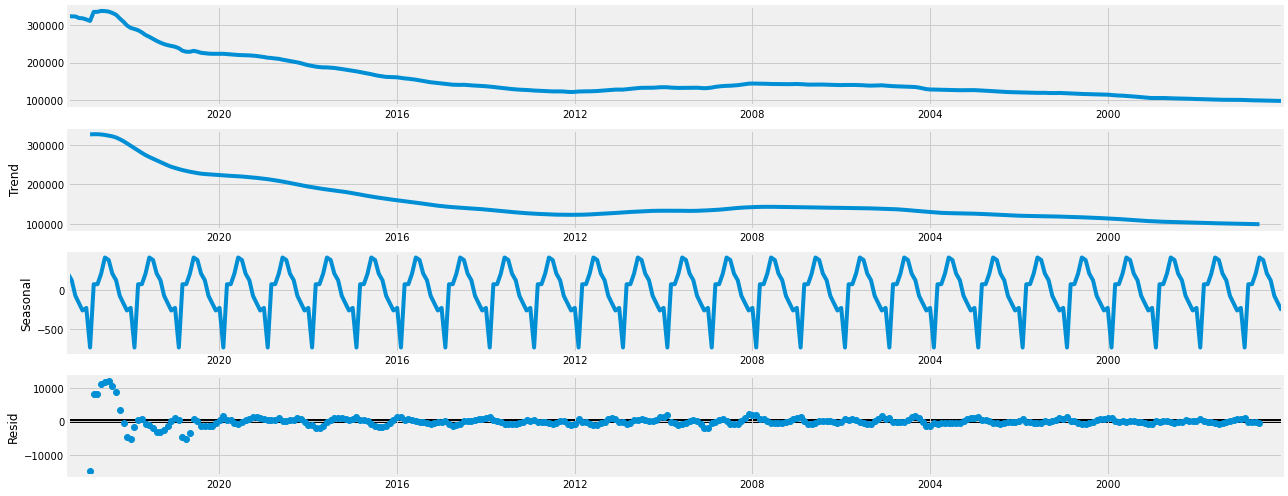

In [123]:
# Plot the separate components

decomposition.plot()
plt.show()

## Bummer!  The timelines for my decompoisition graphs are reversed!  I had noticed that my time series had the most recent timestamps at the beginning, but it did not cause a problem for my line graphs, earlier.

In [126]:
# Let's reverse the order of the dataframe!
reversed_df = ts_zillow_data_dallas_county[::-1]

In [127]:
reversed_df.head()

,value
datetime,
1996-01-31,97443.0
1996-02-29,97503.0
1996-03-31,97707.0
1996-04-30,98032.0
1996-05-31,98381.0


In [128]:
reversed_df.tail()

,value
datetime,
2023-01-31,318855.598152
2023-02-28,319388.827100
2023-03-31,323775.027494
2023-04-30,324002.440681
2023-05-31,324978.027979


In [129]:
reversed_df.shape

(329, 1)

In [131]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(reversed_df, model='additive')

In [132]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

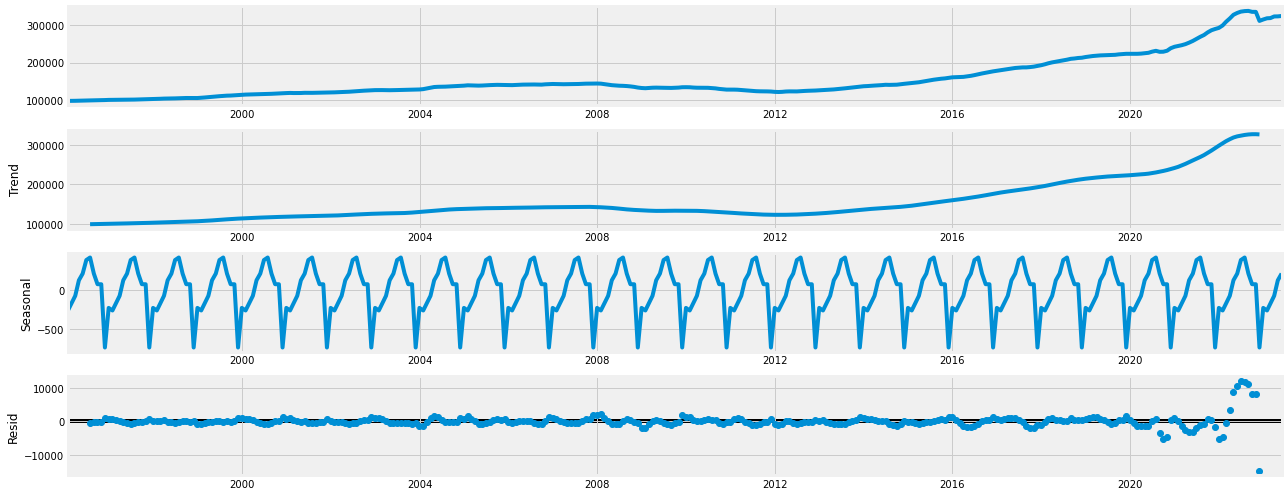

In [133]:
# Plot the separate components

decomposition.plot()
plt.show()

## The reversal appears to have succeeded.
## The original data, or level, is plotted at the top.
## The underlying trend is plotted next, and it matches the level quite closely, except after the year 2020, where some noise is introduced as evident in the bottom plot.  The obvious suspect for the cause of the noise is the COVID-19 pandemic.
## The trend bends slightly upward before the year 2008, then dips downward - likely due to the global financial crisis of that time - until around 2012, after which it begins a markedly steeper ascent than before.  That ascent continues through almost to the present, with a levelling off at the end.
## The third plot shows vary consistent seasonality.

# Step 6:  Conduct a Dickey-Fuller test to check for stationarity.

## Disprove the null hypothesis = no unit root = stationary data = can proceed with forecast

In [135]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only
# return an array of numbers. This is why you need to also define a function that prints the correct output from
# that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(reversed_df['value'])

Dickey-Fuller Stationarity test:
Test Statistic                   2.463516
p-value                          0.999037
Number of Lags Used             16.000000
Number of Observations Used    312.000000
Critical Value (1%)             -3.451484
Critical Value (5%)             -2.870849
Critical Value (10%)            -2.571730
dtype: float64


## Discussion:  The Test Statistic (2.46) is greater than all of the Critical Values.  Therefore, we cannot disprove the null hypothesis (i.e. there *is* a unit root), and thus the data is not stationary (which one could guess from the preceding plot of the level, anyway).

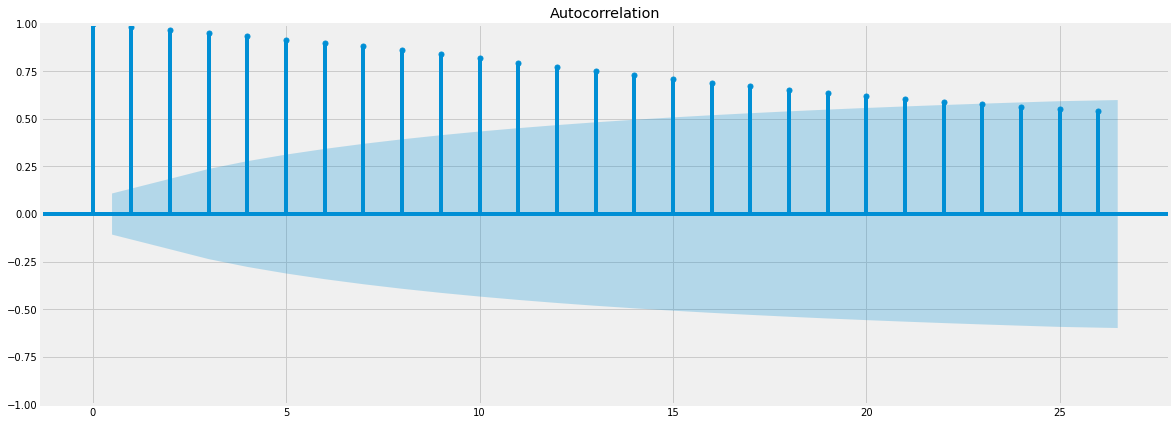

In [136]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(reversed_df)
plt.show()

## Not surprisingly, we see lots of autocorrelations.  After all, real estate prices tend not to rise or fall too precipitously.

# Step 7:  If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

## Stationarizing (differencing)

In [137]:
data_diff = reversed_df - reversed_df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [138]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [139]:
data_diff.head()

,value
datetime,
1996-02-29,60.0
1996-03-31,204.0
1996-04-30,325.0
1996-05-31,349.0
1996-06-30,220.0


In [140]:
data_diff.columns

Index(['value'], dtype='object')

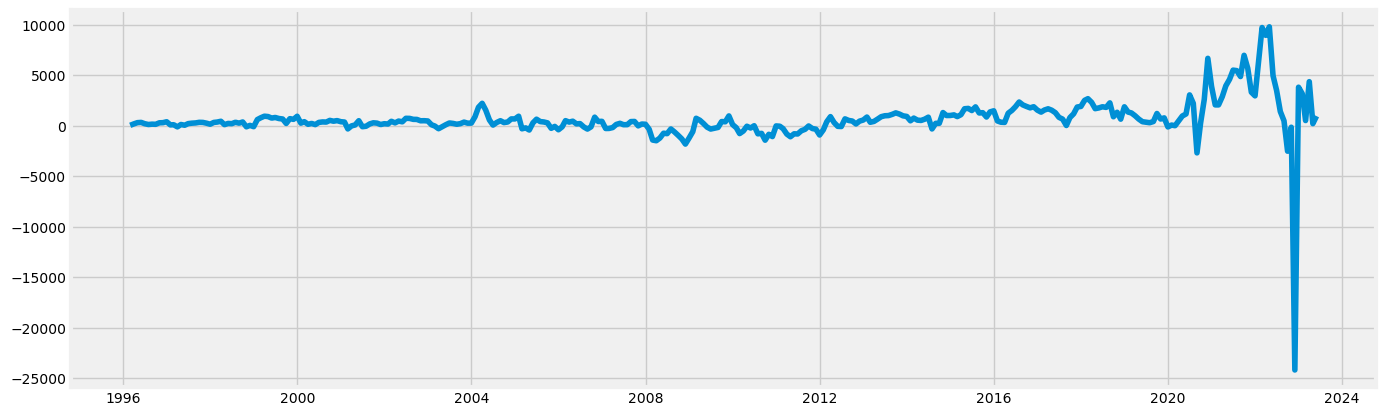

In [141]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [142]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.463406
p-value                          0.124634
Number of Lags Used             15.000000
Number of Observations Used    312.000000
Critical Value (1%)             -3.451484
Critical Value (5%)             -2.870849
Critical Value (10%)            -2.571730
dtype: float64


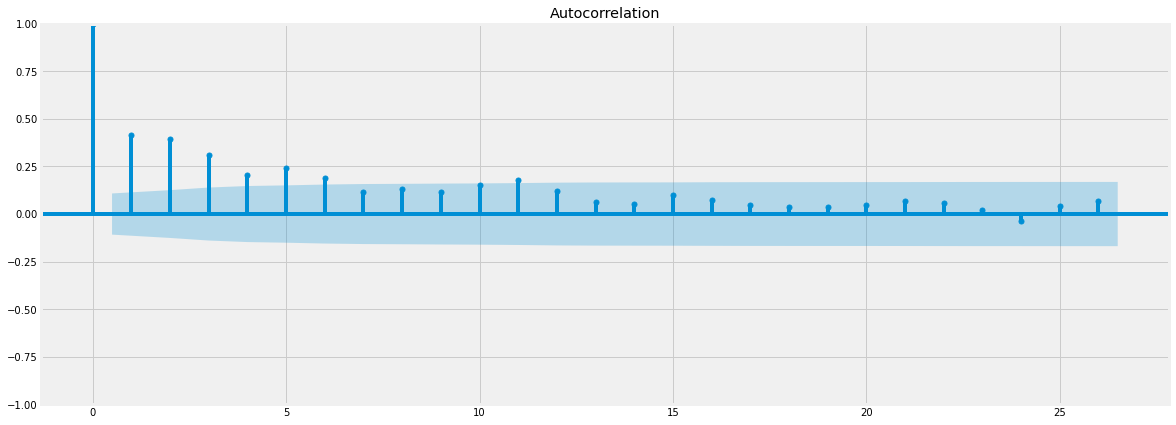

In [143]:
plot_acf(data_diff)
plt.show()

## Discussion:
## After one round of differencing, our Test Statistic (-2.46) is less than all the Critical Values, so we can reject our null hypothesis, i.e. we have eliminated our unit root and the data is stationary.
## However, our p-value (0.12) is still above the preferable thresholds of 0.05 or 0.1; we're only 88% confident about this.
## As with our data in the Exercise, "While the autocorrelation plot has improved (there are fewer autocorrelated terms), it’s still not perfect. This means that, despite the Dickey-Fuller test saying that your data is stationary, that stationarity is weak."
## Our autocorrelation plot still has seven vertical lines above the blue confidence interval, so we could perform a third round of stationarizing/differencing to reduce the remaining autocorrelated terms, if we choose.
## However, according to the Exercise (https://careerfoundry.com/en/course/data-immersion/exercise/sourcing-analyzing-time-series#stationarizing-the-federal-reserve-economic-data), we do not need to perform another round of stationarizing/differencing, "because of the unspoken rule of thumb that you need at least ten significant lags (or ten vertical lines above the confidence interval) for a second round of differencing to be necessary."